In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Systems

Arrival: Entering a system </br>
Departure: Exiting a system </br>
Sojourn: Moving through a system

$$ q_A : Arrival Rate \\
q_D : Departure Rate \\
M : Pool Size \\
w : Sojourn Time
$$

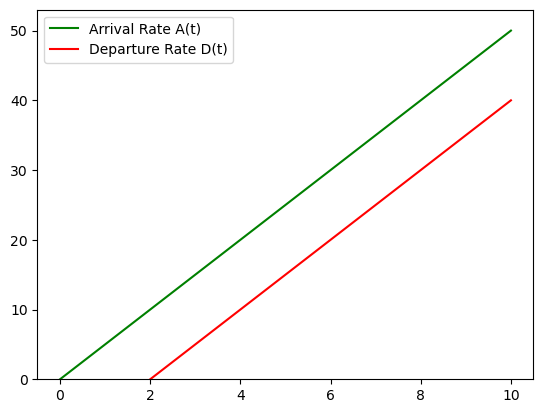

In [2]:
t = np.linspace(0,10)
m = 5
ba = 0
bd = 10
a = m*t+ba
d = m*t-bd
plt.plot(t,a,color='green',label='Arrival Rate A(t)')
plt.plot(t,d,color='red',label='Departure Rate D(t)')
plt.ylim(0)
plt.legend()

**A(t) gives cumulative arrivals of the vehicles in the road segment. </br>
D(t) on the other hand gives us the cumulative departures of the vehicles in the road.**

## Gate Questions

In [3]:
def gate(A,D,mu,Aprime):
    if A>D:
        return mu
    elif A==D:
        return min(mu,Aprime)
    
#A is the arrival rate 
#D is the departure rate
#mu is the capacity

## Cumulative Diagram Practice

In [4]:
df = pd.read_excel('datasets/vertical_queue.xlsx')
time = df['Time']
time = pd.DataFrame(time)
df = df.set_index('Time')

In [5]:
for t in time:
    print(time[t].values)

[ 0  2  4  6  8 10 12 14 16]


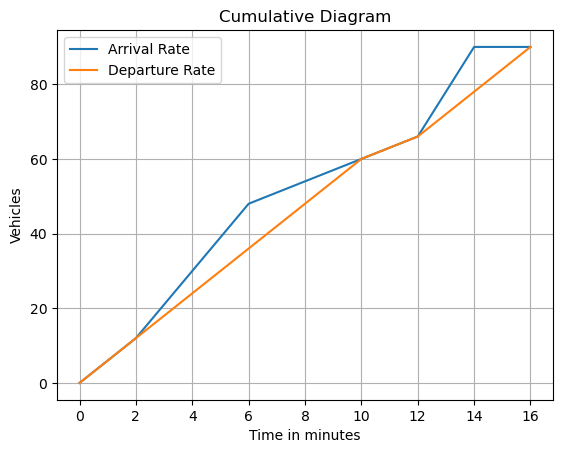

In [6]:
plt.grid()
plt.title('Cumulative Diagram')
plt.xlabel('Time in minutes')
plt.ylabel('Vehicles')
plt.plot(df)
plt.legend(['Arrival Rate','Departure Rate'])

In [7]:
#Wait time of the 40th vehicle
arrival_40 = df.index[df['Arrival'] == 40].values
arrival_40
list(df.index[df['Arrival']==54].values)

[8]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
X = time
y = df['Arrival']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = LinearRegression().fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.967972592589194

In [10]:
arrival = model.predict(np.array([6.2]).reshape(-1,1))[0]
arrival

C:\Users\louis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.85178571428572

In [11]:
X = time
y = df['Departure']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = LinearRegression().fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.9985139686942738

In [12]:
departure = model.predict(np.array([6.2]).reshape(-1,1))[0]
departure

C:\Users\louis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.25714285714286

In [13]:
waiting_time = arrival-departure
print('The waiting time is approximately',round(waiting_time,2),'minutes.')

The waiting time is approximately 3.59 minutes.


In [14]:
#Queue size at t = 6 minutes
t = 6
arrival = df['Arrival'][t]
departure = df['Departure'][t]
queue = arrival-departure
print('Queue at',str(t),'minutes is',str(queue),'vehicles.')

Queue at 6 minutes is 12 vehicles.


In [15]:
#Maximum Queue size
queues = []
times = []
queue_size = 0
idx = 0
for t,arrival,depart in zip(time['Time'],df['Arrival'],df['Departure']):
    queue_size = arrival-depart
    queues.append(queue_size)
    times.append(t)

In [16]:
results = pd.DataFrame({'Times':times,'Queue':queues})

In [17]:
results

,Times,Queue
0,0,0
1,2,0
2,4,6
3,6,12
4,8,6
5,10,0
6,12,0
7,14,12
8,16,0


In [18]:
max_queue = np.max(results['Queue'])
print('The maximum queue is',max_queue,'vehicles.')

The maximum queue is 12 vehicles.


In [19]:
max_queue_index = list(results[results['Queue']==max_queue].index.values)
print('The maximum queue of',max_queue,'vehicles are at times')
for i in max_queue_index:
    print(results['Times'][i],end=' ')
print('minutes.')

The maximum queue of 12 vehicles are at times
6 14 minutes.


In [20]:
#Calculate Total Delay
from scipy.integrate import simpson
from numpy import trapz
from sklearn.metrics import auc

In [21]:
interval = 2
arrival = trapz(df['Arrival'], dx=interval)
departure = trapz(df['Departure'],dx=interval)
total_delay = arrival-departure
print('Total delay is',total_delay,'minutes.')

Total delay is 72.0 minutes.


In [22]:
interval = 2
arrival = simpson(df['Arrival'], dx=interval)
departure = simpson(df['Departure'],dx=interval)
total_delay = arrival-departure
print('Total delay is',total_delay,'minutes.')

Total delay is 80.0 minutes.


In [23]:
arrival = auc(time,df['Arrival'])
departure = auc(time,df['Departure'])
total_delay = arrival-departure
print('Total delay is',total_delay,'minutes.')

Total delay is 72.0 minutes.


**Personally I would prefer trapezoid or auc when computing the delay.**